# Python for Data Analytics: Final Assignment Code

In [4]:
import pandas as pd

# Data Preparation for Random Forest Model

   category_index  category_year  category_region_id category_region  \
0               1           2012                   0        Nacional   
1               2           2012                   0        Nacional   
2               3           2012                   0        Nacional   
3               4           2012                   1        Amazonas   
4               5           2012                   1        Amazonas   

   category_gender_id category_gender  producers_numerical  \
0                   0      gender gap             -862.860   
1                   1             men             1554.781   
2                   2           women              691.921   
3                   0      gender gap              -42.965   
4                   1             men               56.037   

   granted_loans_percent  requested_loans_percent  trained_percent  ...  \
0              -3.667208                -3.972989        -6.792915  ...   
1               9.389683                10.3

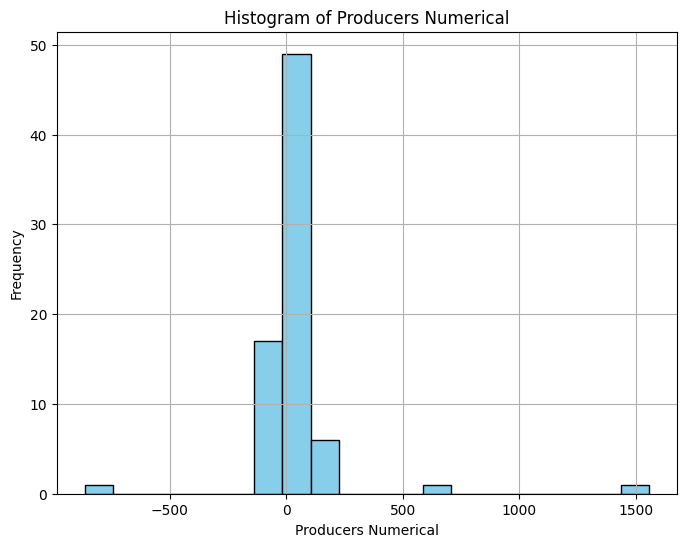

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.org\csv files\#11_python_final_assignment\#5_combined_dataset\concatenate_clean_agriculture_producer_employment.csv')

print(df.head())

import matplotlib.pyplot as plt
# Plot histogram for 'producers_numerical'
plt.figure(figsize=(8, 6))
plt.hist(df['producers_numerical'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Producers Numerical')
plt.ylabel('Frequency')
plt.title('Histogram of Producers Numerical')
plt.grid(True)
plt.show()

# Data Pre-Processing for Random Forest Model (new file)

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.org\csv files\#11_python_final_assignment\#6_statystical_ratios\ml_producer_profile_selected_features.csv')

# Step 2: Specifying categorical and numerical columns (Gender Gap Values Only)
categorical_columns = ['category_region_id']
numerical_columns = ['producers_numerical', 'granted_loans_percent', 'requested_loans_percent', 'trained_percent', 'employment_agriculture_percent', 'illiteracy_percent', 'education_primary_completed_percent', 'education_secondary_completed_percent', 'belongs_producers_association_percent', 'language_spanish_percent', 'language_quechua_percent', 'language_aymara_percent', 'language_amazonia_percent']

# Handling missing values (the dataset has no missing values)
imputer = SimpleImputer(strategy='most_frequent') # for categorical columns
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
imputer = SimpleImputer(strategy='mean') # for numerical columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Step 3: Encoding categorical variables
encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(encoder.fit_transform)

# Step 4: Scale numerical variables
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 5: Print the preprocessed data
print(df)

    category_region_id  producers_numerical  granted_loans_percent  \
0                    0            -4.844443              -0.016926   
1                    1             0.159103               0.088910   
2                    2             0.116970               0.695255   
3                    3             0.235106              -0.107555   
4                    4             0.312079              -1.640356   
5                    5             0.228295               0.236927   
6                    6            -0.176348               0.391510   
7                    7            -0.006645               0.734700   
8                    8             0.244107               0.545425   
9                    9             0.107505               0.352217   
10                  10             0.366362              -2.090400   
11                  11             0.155747              -0.770499   
12                  12             0.096661               0.294958   
13                  

# Feature Selection & Importance

In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Loading the dataset
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.org\csv files\#11_python_final_assignment\#6_statystical_ratios\ml_producer_profile_selected_features.csv')

# Step 2: Defining features and target variable
X = df[['producers_numerical', 'granted_loans_percent', 'requested_loans_percent', 'trained_percent', 'employment_agriculture_percent', 'illiteracy_percent', 'education_primary_completed_percent', 'education_secondary_completed_percent', 'belongs_producers_association_percent', 'language_spanish_percent', 'language_quechua_percent', 'language_aymara_percent', 'language_amazonia_percent']]  # Features
y = df['category_region_id']  # Target variable

# Step 3: Initializing the model
model = RandomForestRegressor(random_state=1, max_depth=10)

# Step 4: Fitting the model
model.fit(X, y)

# Step 5: Getting feature importances
importances = model.feature_importances_

# Step 6: Sorting features by importance
sorted_indices = np.argsort(importances)[::-1]

# Step 7: Printing the Results
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{X.columns[sorted_indices[i]]}: {importances[sorted_indices[i]]}")

Feature ranking:
language_spanish_percent: 0.3210136077567078
illiteracy_percent: 0.17804733611080484
language_aymara_percent: 0.0882685751952421
employment_agriculture_percent: 0.06844365758218939
education_primary_completed_percent: 0.06412938747994443
producers_numerical: 0.061411208554358075
language_quechua_percent: 0.05619695403992576
education_secondary_completed_percent: 0.04351199317642433
granted_loans_percent: 0.034491283300541756
requested_loans_percent: 0.02729370609048746
language_amazonia_percent: 0.022402207529327863
belongs_producers_association_percent: 0.018921675385336022
trained_percent: 0.01586840779871022


# Training the Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Step 1: Loading the dataset
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.org\csv files\#11_python_final_assignment\#6_statystical_ratios\ml_producer_profile_selected_features.csv')

# Step 2: Defining features and target variable
X = df[['producers_numerical', 'granted_loans_percent', 'requested_loans_percent', 'trained_percent', 'employment_agriculture_percent', 'illiteracy_percent', 'education_primary_completed_percent', 'education_secondary_completed_percent', 'belongs_producers_association_percent', 'language_spanish_percent', 'language_quechua_percent', 'language_aymara_percent', 'language_amazonia_percent']]  # Features
y = df['category_region_id']  # Target variable

# Step 3: Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the model
model = RandomForestRegressor(random_state=1, max_depth=10)

# Step 5, Fitting the model on the training set
model.fit(X_train, y_train)

# Step 6: Printing a success message
print("model trained")

model trained


# Printing the Decision Tree

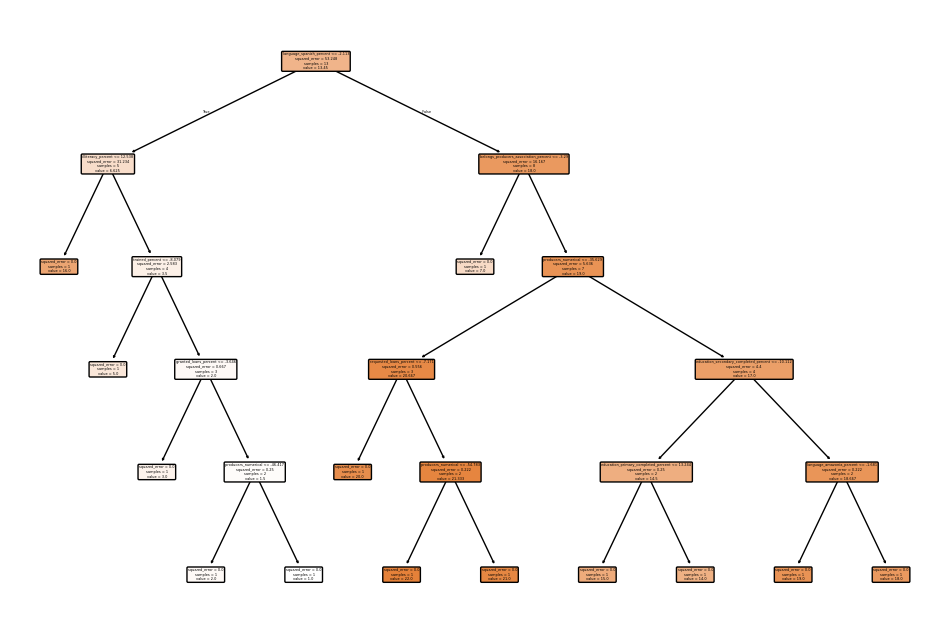

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Choose a tree
selected_tree = model.estimators_[0]

# Step 2: Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(selected_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Performing a Prediction

In [10]:
y_pred = model.predict(X_test)
print("prediction performed")

prediction performed


# Model Evaluation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Step 1: Calculate MAE, MSE, and R2 score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Step 2: Printing the Evaluation Results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 5.09
MSE: 37.73
R2 Score: 0.41
